In [4]:
!pip install convertdate
!pip install prophet
!pip install plotly

     |████████████████████████████████| 21.8 MB 31.6 MB/s 


In [5]:
import pandas as pd


df = pd.read_csv('../../data/finance.yahoo.com/N225.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-16,16878.660156,16887.570313,16596.509766,16596.509766,16596.509766,110000000.0
1,2016-08-17,16596.259766,16772.109375,16596.259766,16745.640625,16745.640625,117400000.0
2,2016-08-18,16649.910156,16714.609375,16481.410156,16486.009766,16486.009766,130400000.0
3,2016-08-19,16558.380859,16613.039063,16452.619141,16545.820313,16545.820313,121900000.0
4,2016-08-22,16599.259766,16631.230469,16540.939453,16598.189453,16598.189453,95300000.0


In [8]:
from prophet import Prophet

new_df = df.rename(columns={'Date': 'ds', 'Adj Close': 'y'})
m = Prophet()
m.fit(new_df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Initial log joint probability = -4.92463
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3508.71    0.00551808       503.669       3.139      0.3139      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        3570.8    0.00373413        818.03      0.3636      0.3636      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3598.34      0.146954       1559.53           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3636.43     0.0103808       1515.77           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3644.61   0.000869072       125.621 

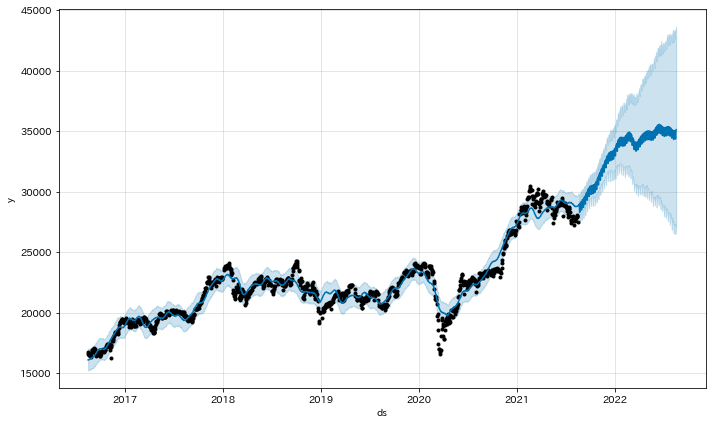

In [9]:
fig1 = m.plot(forecast)